In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/air.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


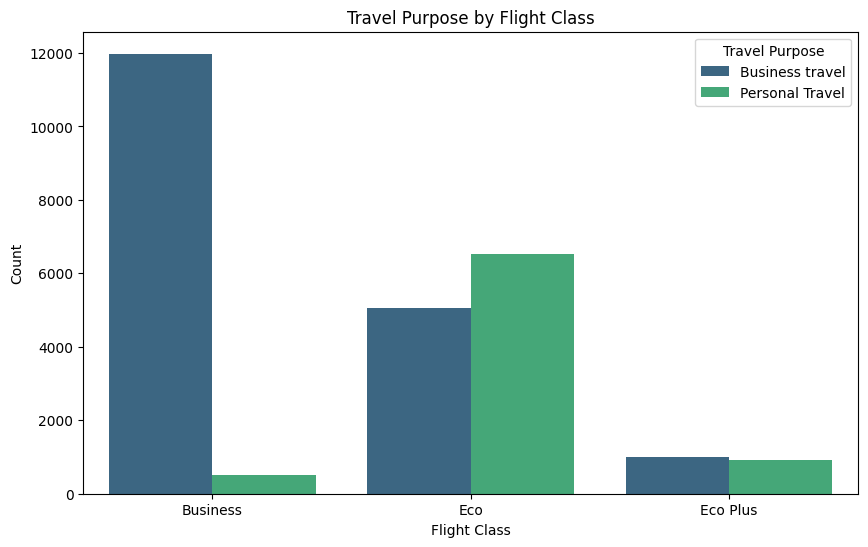

In [ ]:
# 교차 빈도표 생성
cross_tab = pd.crosstab(df['Class'], df['Type of Travel'])

# 데이터프레임 형태로 변환
cross_tab = cross_tab.reset_index().melt(id_vars='Class', var_name='Type of Travel', value_name='Count')

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', hue='Type of Travel', data=cross_tab, palette='viridis')
plt.title('Travel Purpose by Flight Class')
plt.xlabel('Flight Class')
plt.ylabel('Count')
plt.legend(title='Travel Purpose')
plt.show()

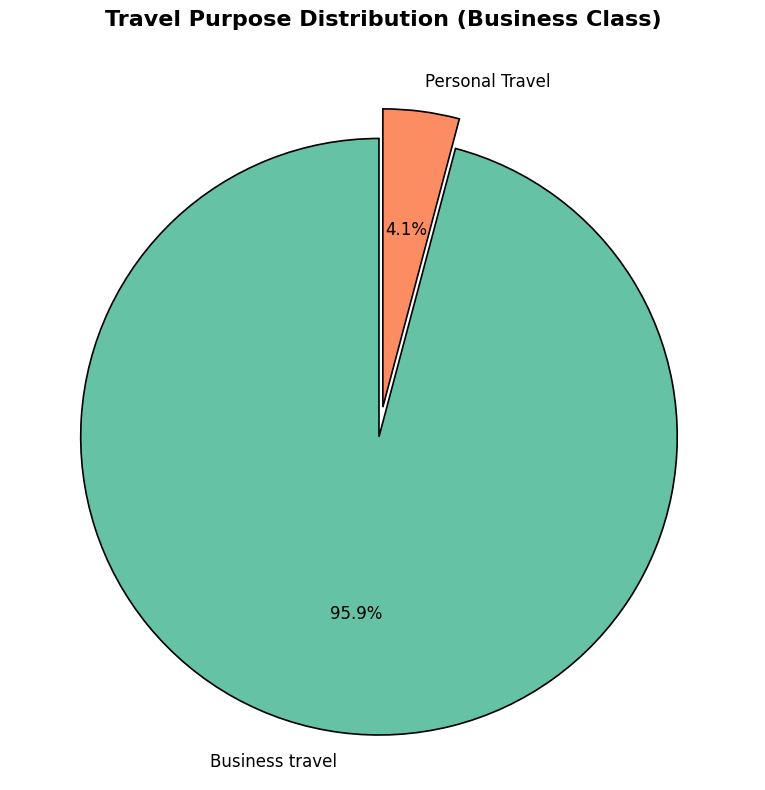

In [ ]:
# 비즈니스 클래스 승객 필터링
business_class_data = df[df['Class'] == 'Business']

# 여행 목적별 비율 계산
purpose_counts = business_class_data['Type of Travel'].value_counts()
purpose_ratios = purpose_counts / purpose_counts.sum()

# 원그래프 그리기
plt.figure(figsize=(8, 8))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
explode = [0.1 if i == purpose_ratios.idxmax() else 0 for i in purpose_ratios.index]

plt.pie(
    purpose_ratios,
    labels=purpose_ratios.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
    textprops={'fontsize': 12}
)

plt.title('Travel Purpose Distribution (Business Class)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

-> 비즈니스 클래스 고객은 거의 모두 출장 목적의 고객임

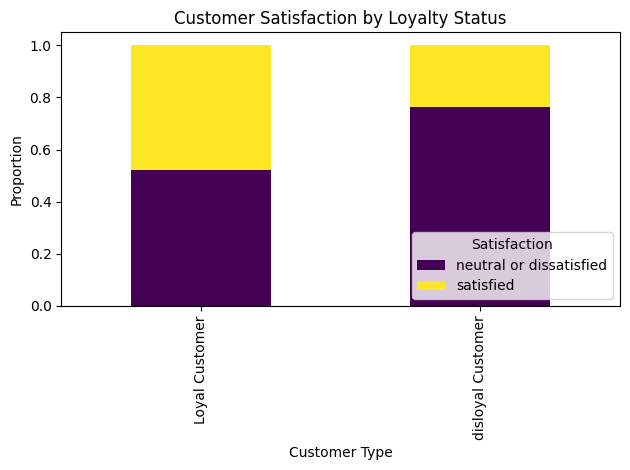

In [ ]:
# 교차표로 비율 계산
cross_tab = pd.crosstab(df['Customer Type'], df['satisfaction'], normalize='index')

# 시각화
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Customer Satisfaction by Loyalty Status')
plt.xlabel('Customer Type')
plt.ylabel('Proportion')
plt.legend(title='Satisfaction', loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
# 범주형 변수 원핫인코딩
categorical_variables = ['Gender','Customer Type','Type of Travel','Class']
df = pd.get_dummies(df, columns = categorical_variables)
df.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,70172,13,460,3,4,3,1,5,3,...,neutral or dissatisfied,False,True,True,False,False,True,False,False,True
1,1,5047,25,235,3,2,3,3,1,3,...,neutral or dissatisfied,False,True,False,True,True,False,True,False,False
2,2,110028,26,1142,2,2,2,2,5,5,...,satisfied,True,False,True,False,True,False,True,False,False
3,3,24026,25,562,2,5,5,5,2,2,...,neutral or dissatisfied,True,False,True,False,True,False,True,False,False
4,4,119299,61,214,3,3,3,3,4,5,...,satisfied,False,True,True,False,True,False,True,False,False


In [ ]:
# X,y 지정 (도착 시간 딜레이 변수 삭제 )
y = df.pop('satisfaction')
X = df.iloc[:,2:]
X = X.drop(['Arrival Delay in Minutes'], axis=1)
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,25,False,True,True,False,False,True,False,False,True
1,25,235,3,2,3,3,1,3,1,1,...,1,False,True,False,True,True,False,True,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,0,True,False,True,False,True,False,True,False,False
3,25,562,2,5,5,5,2,2,2,2,...,11,True,False,True,False,True,False,True,False,False
4,61,214,3,3,3,3,4,5,5,3,...,0,False,True,True,False,True,False,True,False,False


In [ ]:
X.shape

(103904, 26)

In [ ]:
# z-score 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaler, columns=X.columns)

In [ ]:
# y 변수 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

y_scaled = pd.DataFrame(y_numeric)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

cv = StratifiedKFold(n_splits=5,shuffle=False)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import auc

## 로지스틱

In [ ]:
logit = LogisticRegression(fit_intercept=True)

tprs = []
aucs = []
mean_fpr_lr = np.linspace(0, 1, 100)

i = 1
for train, test in cv. split(X_scaled, y_numeric):
    prediction = logit.fit(X_scaled.iloc[train], y_numeric[train]).predict_proba(X_scaled.iloc[test])
    fpr, tpr, t = roc_curve(y_numeric[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr_lr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
mean_tpr_lr = np.mean(tprs, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)

In [ ]:
# 계수 및 절편
print(f"회귀 계수 (Beta): {logit.coef_}")
print(f"절편 (Intercept): {logit.intercept_}")

회귀 계수 (Beta): [[-0.12760255 -0.01967423  0.52092582 -0.19321345 -0.2041174   0.03698233
  -0.03872614  0.82514226  0.0895107   0.08313344  0.37653312  0.32533775
   0.15527719  0.40567778  0.15181762  0.28614406 -0.16241493 -0.01439899
   0.01439899  0.3901798  -0.3901798   0.62373876 -0.62373876  0.21105884
  -0.15370259 -0.11195796]]
절편 (Intercept): [-0.49859284]


In [ ]:
# 회귀 계수 가져오기
coefficients = logit.coef_.flatten()  # 계수는 2차원 배열로 출력되므로 1차원으로 변환

# 오즈비 계산
odds_ratios = np.exp(coefficients)

In [ ]:
odds_ratio = odds_ratios[1:]
odds_ratio.shape

(25,)

In [ ]:
odds_ratios.shape

(26,)

In [ ]:
variables.shape

(25,)

In [ ]:
import numpy as np
odds_ratios = np.exp(logit.coef_)
print(f"오즈비 (Odds Ratios): {odds_ratios}")


오즈비 (Odds Ratios): [[0.88020314 0.98051805 1.68358563 0.82430601 0.81536664 1.03767468
  0.96201413 2.28220541 1.09363903 1.08668681 1.4572238  1.38449817
  1.16798167 1.50031904 1.16394794 1.33128422 0.85008841 0.98570418
  1.01450315 1.47724637 0.67693515 1.86589114 0.53593695 1.23498502
  0.85752702 0.89408185]]


In [ ]:
variables =  X_scaled.columns[1:]

In [ ]:
results = pd.DataFrame({
    'Variable': variables,
    'Odds Ratio': odds_ratio
})
print(results)

                             Variable  Odds Ratio
0                     Flight Distance    0.980518
1               Inflight wifi service    1.683586
2   Departure/Arrival time convenient    0.824306
3              Ease of Online booking    0.815367
4                       Gate location    1.037675
5                      Food and drink    0.962014
6                     Online boarding    2.282205
7                        Seat comfort    1.093639
8              Inflight entertainment    1.086687
9                    On-board service    1.457224
10                   Leg room service    1.384498
11                   Baggage handling    1.167982
12                    Checkin service    1.500319
13                   Inflight service    1.163948
14                        Cleanliness    1.331284
15         Departure Delay in Minutes    0.850088
16                      Gender_Female    0.985704
17                        Gender_Male    1.014503
18       Customer Type_Loyal Customer    1.477246


In [ ]:
sorted_df = results.sort_values(by="Odds Ratio", ascending=False).reset_index(drop=True)

# 출력
print(sorted_df)

                             Variable  Odds Ratio
0                     Online boarding    2.282205
1      Type of Travel_Business travel    1.865891
2               Inflight wifi service    1.683586
3                     Checkin service    1.500319
4        Customer Type_Loyal Customer    1.477246
5                    On-board service    1.457224
6                    Leg room service    1.384498
7                         Cleanliness    1.331284
8                      Class_Business    1.234985
9                    Baggage handling    1.167982
10                   Inflight service    1.163948
11                       Seat comfort    1.093639
12             Inflight entertainment    1.086687
13                      Gate location    1.037675
14                        Gender_Male    1.014503
15                      Gender_Female    0.985704
16                    Flight Distance    0.980518
17                     Food and drink    0.962014
18                     Class_Eco Plus    0.894082


In [ ]:
variables

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Gender_Female',
       'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')

In [ ]:
odds_ratios

array([[0.86572006, 0.98998578, 1.73741871, 0.79070104, 0.78233548,
        1.01646191, 0.96302354, 2.2509454 , 1.07339676, 1.09592215,
        1.42640688, 1.34182657, 1.1702807 , 1.54092471, 1.19398112,
        1.3610012 , 0.81954824, 0.96172048, 1.03980316, 1.48124202,
        0.67510912, 1.90537041, 0.52483233, 1.196477  , 0.87535331,
        0.9141633 ]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=5, random_state=530)

tprs = []
aucs = []
mean_fpr_rf = np.linspace(0, 1, 100)

i = 1
for train, test in cv. split(X_scaled, y_numeric):
    prediction = rf.fit(X_scaled.iloc[train], y_numeric[train]).predict_proba(X_scaled.iloc[test])
    fpr, tpr, t = roc_curve(y_numeric[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr_rf, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
mean_tpr_rf = np.mean(tprs, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier(n_estimators=5, random_state=530, eval_metric='logloss')

tprs = []
aucs = []
mean_fpr_xgb = np.linspace(0, 1, 100)

i = 1
for train, test in cv. split(X_scaled, y_numeric):
    prediction = xgb.fit(X_scaled.iloc[train], y_numeric[train]).predict_proba(X_scaled.iloc[test])
    fpr, tpr, t = roc_curve(y_numeric[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr_xgb, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
mean_tpr_xgb = np.mean(tprs, axis=0)
mean_auc_xgb = auc(mean_fpr_xgb, mean_tpr_xgb)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', probability=True, random_state=530)

In [ ]:
tprs = []
aucs = []
mean_fpr_svm = np.linspace(0, 1, 100)

i = 1
for train, test in cv. split(X_scaled, y_numeric):
    prediction = svm.fit(X_scaled.iloc[train], y_numeric[train]).predict_proba(X_scaled.iloc[test])
    fpr, tpr, t = roc_curve(y_numeric[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr_svm, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
mean_tpr_svm = np.mean(tprs, axis=0)
mean_auc_svm = auc(mean_fpr_svm, mean_tpr_svm)

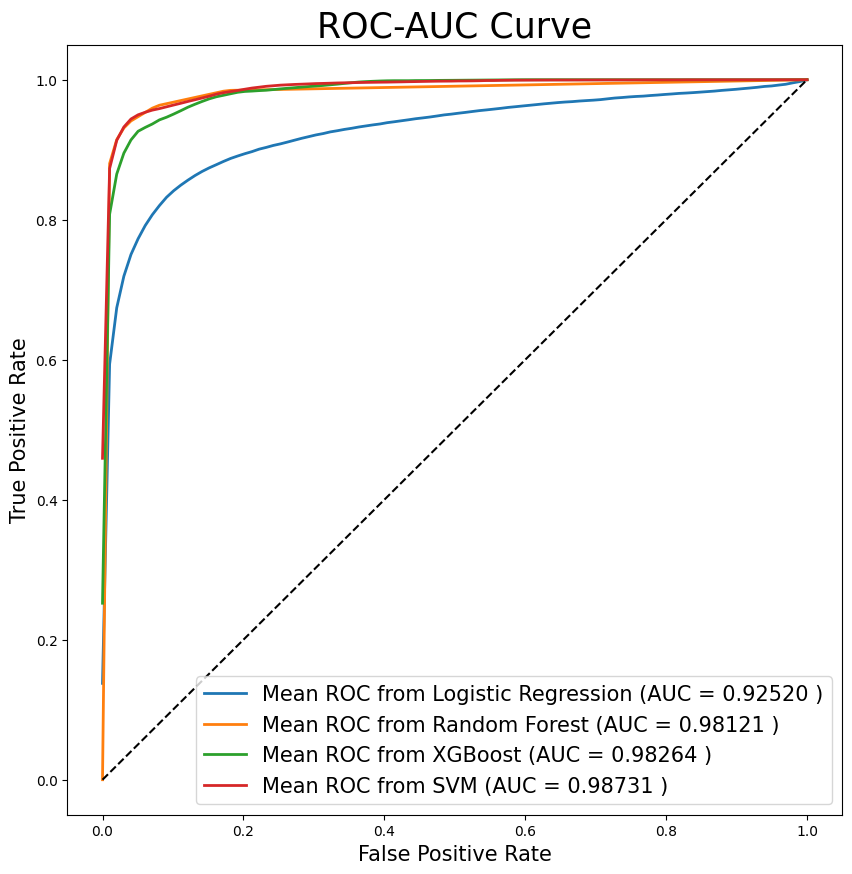

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(mean_fpr_lr, mean_tpr_lr, label=r'Mean ROC from Logistic Regression (AUC = %0.5f )' % (mean_auc_lr),lw=2, alpha=1)
plt.plot(mean_fpr_rf, mean_tpr_rf, label=r'Mean ROC from Random Forest (AUC = %0.5f )' % (mean_auc_rf),lw=2, alpha=1)
plt.plot(mean_fpr_xgb, mean_tpr_xgb, label=r'Mean ROC from XGBoost (AUC = %0.5f )' % (mean_auc_xgb),lw=2, alpha=1)
plt.plot(mean_fpr_svm, mean_tpr_svm, label=r'Mean ROC from SVM (AUC = %0.5f )' % (mean_auc_svm),lw=2, alpha=1)


plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title("ROC-AUC Curve", fontsize=25)
plt.plot([0,1],[0,1], 'k--')
plt.legend(loc="lower right", fontsize=15);

logistic regression accuracy

In [ ]:
# 교차 검증 수행
cv_scores = cross_val_score(logit, X_scaled, y_numeric, cv=5, scoring='accuracy')

# 결과 출력
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.87397142 0.87363457 0.87320148 0.8744045  0.87892204]
Mean CV Score: 0.8748
Standard Deviation: 0.0021


random forest accuracy

In [ ]:
# 교차 검증 수행
cv_scores = cross_val_score(rf, X_scaled, y_numeric, cv=5, scoring='accuracy')

# 결과 출력
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.95284154 0.95394832 0.9515904  0.95558443 0.95384986]
Mean CV Score: 0.9536
Standard Deviation: 0.0013


XGBoost accuracy

In [ ]:
# 교차 검증 수행
cv_scores = cross_val_score(xgb, X_scaled, y_numeric, cv=5, scoring='accuracy')

# 결과 출력
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.93729849 0.93956018 0.93811655 0.94211058 0.94104909]
Mean CV Score: 0.9396
Standard Deviation: 0.0018


SVM accuracy

In [ ]:
# 교차 검증 수행
cv_scores = cross_val_score(svm, X_scaled, y_numeric, cv=5, scoring='accuracy')

# 결과 출력
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.95173476 0.9532265  0.95226409 0.95544007 0.95529355]
Mean CV Score: 0.9536
Standard Deviation: 0.0015


In [ ]:
# 변수 중요도 계산
importances = rf.feature_importances_
feature_names = X_scaled.columns

# 변수 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 결과 출력
print("Feature Importances:")
print(importance_df)

Feature Importances:
                              Feature  Importance
7                     Online boarding    0.187165
2               Inflight wifi service    0.147293
21     Type of Travel_Business travel    0.106197
23                     Class_Business    0.085462
9              Inflight entertainment    0.049740
10                   On-board service    0.042741
19       Customer Type_Loyal Customer    0.039301
4              Ease of Online booking    0.033077
15                        Cleanliness    0.032860
20    Customer Type_disloyal Customer    0.029477
1                     Flight Distance    0.028684
12                   Baggage handling    0.027823
0                                 Age    0.025414
8                        Seat comfort    0.024367
13                    Checkin service    0.023845
14                   Inflight service    0.023459
11                   Leg room service    0.016746
6                      Food and drink    0.014813
5                       Gate 

In [ ]:
importance_10 = importance_df[:10]

<ipython-input-20-e2e75ef211b9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


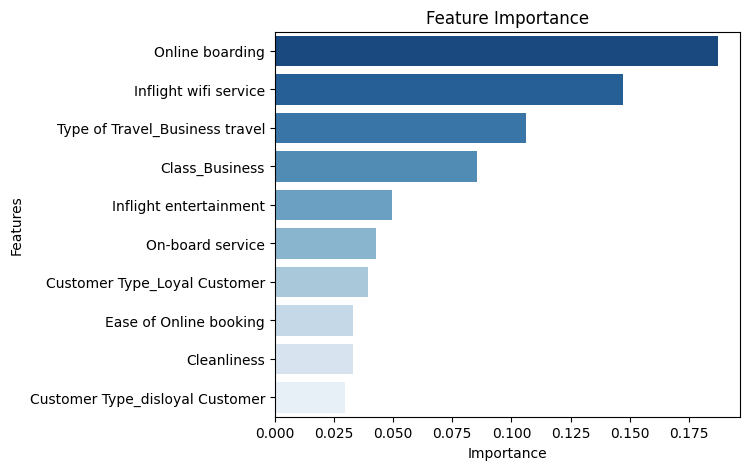

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 변수 중요도 시각화 (색상 그라데이션 추가)
plt.figure(figsize=(6, 5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_10,
    palette='Blues_r'  # 중요도가 클수록 진한 색상
)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()